## 1. Context

Specklegrams are created by a process called modal interference, which happens at the end of a multimode optical fiber. The dimensions of a multimode fiber (MMF) allow several light modes at different wavelengths to propagate, meaning that electromagnetic waves travel along several specific paths.

When a laser beam goes into an optical fiber, it creates different ways the light can travel. This depends on the size of the fiber. There's a relationship between the diameter of the core and the cladding, and the number of ways the light can travel. Speckle or specklegrams are created from these optical paths and the phase delays of each mode. This pattern is a changing spatial distribution of intensities, where constructive interference creates areas of maximum intensity, while total destructive interference between modes produces areas of no light.

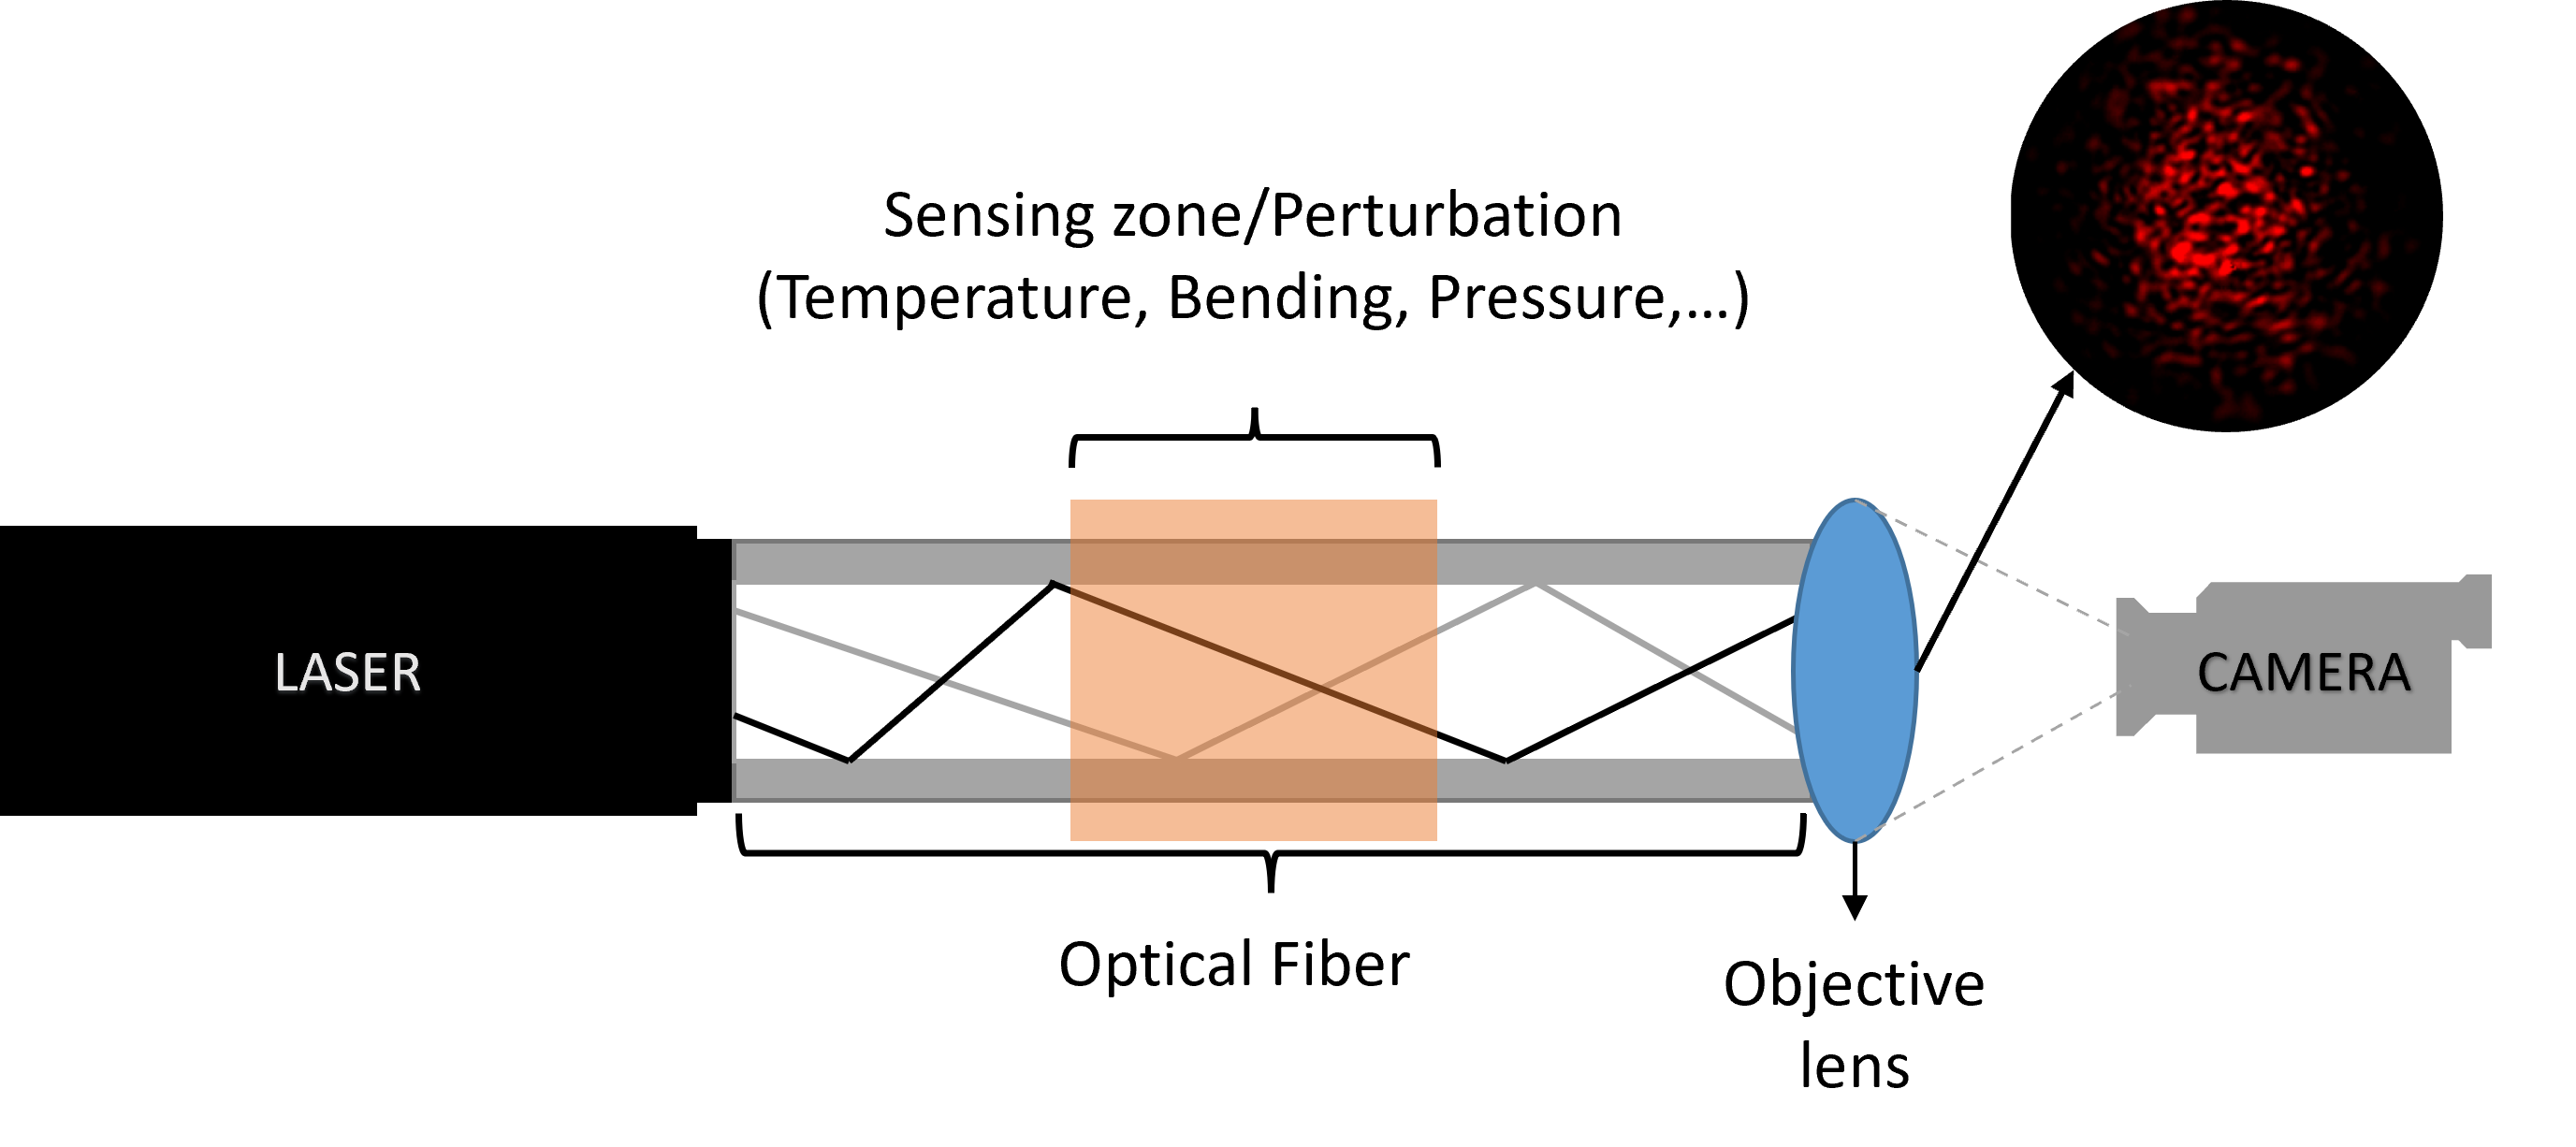

The specklegram has great metrological utility, as the patterns generated can give information about the disturbances made along the fiber. The prediction of the magnitude of these disturbances will depend on the mathematical tools used.

Synthetic specklegram simulations were performed using the Finite Element Method (FEM) within COMSOL Multiphysics, integrated with Matlab. This model simulated the propagation of an optical field through a multimode optical fiber, concentrating specifically on the sensing region affected by temperature fluctuations. This method facilitated an accurate approximation of the behavior of the fiber under perturbations, excluding undisturbed regions to optimize computational efficiency [1].


## 2. Advanced data handling with Pandas

In [2]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from glob import glob
from sklearn.metrics import roc_auc_score
import seaborn as sns
from scipy.stats import f_oneway, shapiro, kruskal
#!pip install skrebate
#!pip install pymrmr



from skrebate import ReliefF
#from pymrmr import mRMR

First we import all the images from the folder and get the data of pixel intensities, this data is flattened to get the dataFrame. Then we add the name of the columns, called as the designated pixel. Then we add a column of the temperature of the imagen to better understanding of the dataframe.

In [3]:
Imgs_route = '.\Dataset_I' 

imgs = sorted(glob(os.path.join(Imgs_route, 'FSS_0632.8nm_00.3mm_*.tiff')))
print(f"{len(imgs)} images were found.")

Size_test = cv2.imread(imgs[0], cv2.IMREAD_GRAYSCALE)
Height, Width = Size_test.shape
Height, Width = Height - 1, Width - 1

Intensities = []

for route in imgs:
    img = cv2.imread(route, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Imagen could not be read: {route}")
        continue
    
    Intensities.append(img[:90,:90].flatten())

df = pd.DataFrame(Intensities)

# Columns with pixel position
cols = [f'pix_{i}_{j}' for i in range(Height) for j in range(Width)]
df.columns = cols

def temp_extraction(file):
    base = os.path.basename(file)
    parts = base.split('_')
    for part in parts:
        if 'C' in part:
            try:
                return float(part.replace('C', '').replace(',', '.'))
            except ValueError:
                return np.nan
    return np.nan

df['temperature'] = [temp_extraction(route) for route in imgs]
cols = ['temperature'] + [col for col in df.columns if col != 'temperature']
df = df[cols]

print(df.info())
df.head()

1001 images were found.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 8101 entries, temperature to pix_89_89
dtypes: float64(1), uint8(8100)
memory usage: 7.7 MB
None


,temperature,pix_0_0,pix_0_1,pix_0_2,pix_0_3,pix_0_4,pix_0_5,pix_0_6,pix_0_7,pix_0_8,...,pix_89_80,pix_89_81,pix_89_82,pix_89_83,pix_89_84,pix_89_85,pix_89_86,pix_89_87,pix_89_88,pix_89_89
0,0.0,37,33,30,27,24,21,19,16,14,...,8,9,10,12,13,15,17,20,23,25
1,0.1,37,33,30,27,24,21,19,16,14,...,8,9,10,12,13,15,17,20,22,25
2,0.2,37,33,30,27,24,21,19,16,14,...,8,9,10,12,13,15,17,20,22,25
3,0.3,37,33,30,27,24,21,19,16,14,...,8,9,10,12,13,15,17,20,22,25
4,0.4,36,33,30,27,24,21,19,16,14,...,8,9,10,12,13,15,17,20,22,25


In [4]:
df

,temperature,pix_0_0,pix_0_1,pix_0_2,pix_0_3,pix_0_4,pix_0_5,pix_0_6,pix_0_7,pix_0_8,...,pix_89_80,pix_89_81,pix_89_82,pix_89_83,pix_89_84,pix_89_85,pix_89_86,pix_89_87,pix_89_88,pix_89_89
0,0.0,37,33,30,27,24,21,19,16,14,...,8,9,10,12,13,15,17,20,23,25
1,0.1,37,33,30,27,24,21,19,16,14,...,8,9,10,12,13,15,17,20,22,25
2,0.2,37,33,30,27,24,21,19,16,14,...,8,9,10,12,13,15,17,20,22,25
3,0.3,37,33,30,27,24,21,19,16,14,...,8,9,10,12,13,15,17,20,22,25
4,0.4,36,33,30,27,24,21,19,16,14,...,8,9,10,12,13,15,17,20,22,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,99.6,8,6,5,4,3,2,1,1,1,...,3,3,3,4,4,5,6,7,8,9
997,99.7,8,6,5,4,3,2,1,1,1,...,3,3,3,4,4,5,6,7,8,9
998,99.8,8,7,5,4,3,2,1,1,1,...,3,3,3,4,5,5,6,7,8,9
999,99.9,8,7,5,4,3,2,1,1,1,...,3,3,3,4,5,5,6,7,8,9


Here we add a column with the categories of the data. As we have a set of images representing a continous variable (Temperature) which goes from 0.0°C to 100.0°C, we group the images in a range of 10 °C which means that we will have 10 classes, each with 100 images. The last category will have 101 images.

In [5]:
df['Categories'] = df.index // 101

New_cols = ['Categories'] + cols
df = df[New_cols]


In [6]:

df


,Categories,temperature,pix_0_0,pix_0_1,pix_0_2,pix_0_3,pix_0_4,pix_0_5,pix_0_6,pix_0_7,...,pix_89_80,pix_89_81,pix_89_82,pix_89_83,pix_89_84,pix_89_85,pix_89_86,pix_89_87,pix_89_88,pix_89_89
0,0,0.0,37,33,30,27,24,21,19,16,...,8,9,10,12,13,15,17,20,23,25
1,0,0.1,37,33,30,27,24,21,19,16,...,8,9,10,12,13,15,17,20,22,25
2,0,0.2,37,33,30,27,24,21,19,16,...,8,9,10,12,13,15,17,20,22,25
3,0,0.3,37,33,30,27,24,21,19,16,...,8,9,10,12,13,15,17,20,22,25
4,0,0.4,36,33,30,27,24,21,19,16,...,8,9,10,12,13,15,17,20,22,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,9,99.6,8,6,5,4,3,2,1,1,...,3,3,3,4,4,5,6,7,8,9
997,9,99.7,8,6,5,4,3,2,1,1,...,3,3,3,4,4,5,6,7,8,9
998,9,99.8,8,7,5,4,3,2,1,1,...,3,3,3,4,5,5,6,7,8,9
999,9,99.9,8,7,5,4,3,2,1,1,...,3,3,3,4,5,5,6,7,8,9


The next image is shown as an example of the reconstruction of the specklegram image from the data in the dataFrame

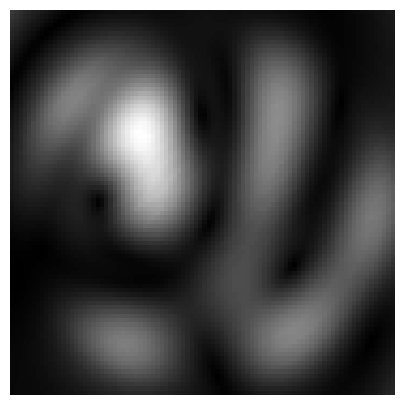

In [7]:
# Img #100 visualization
index= 0
image = df.iloc[index][2:].values.reshape((Height, Width))

plt.figure(figsize=(5,5))
plt.imshow(image, cmap='gray')
#plt.title(f"Image #{index+1} - {df.iloc[index]['temperature']} °C")
plt.axis('off')
plt.show()

Here the data is grouped by the categories showing a mean of the intensities of the images within the range of temperature.

In [8]:

df_grouped = df.groupby('Categories').mean().astype(int)
df_grouped['temperature'] = [f'{i*10:.1f}–{i*10+9.9:.1f}°C' for i in range(9)] + ['90.0–100.0°C']
print(df_grouped.columns)
df_grouped


Index(['temperature', 'pix_0_0', 'pix_0_1', 'pix_0_2', 'pix_0_3', 'pix_0_4',
       'pix_0_5', 'pix_0_6', 'pix_0_7', 'pix_0_8',
       ...
       'pix_89_80', 'pix_89_81', 'pix_89_82', 'pix_89_83', 'pix_89_84',
       'pix_89_85', 'pix_89_86', 'pix_89_87', 'pix_89_88', 'pix_89_89'],
      dtype='object', length=8101)


,temperature,pix_0_0,pix_0_1,pix_0_2,pix_0_3,pix_0_4,pix_0_5,pix_0_6,pix_0_7,pix_0_8,...,pix_89_80,pix_89_81,pix_89_82,pix_89_83,pix_89_84,pix_89_85,pix_89_86,pix_89_87,pix_89_88,pix_89_89
Categories,,,,,,,,,,,,,,,,,,,,,
0,0.0–9.9°C,41,38,34,31,28,26,23,20,17,...,9,10,11,13,14,16,18,21,23,26
1,10.0–19.9°C,47,44,40,37,34,31,29,26,23,...,11,12,13,15,16,18,20,22,24,26
2,20.0–29.9°C,55,52,49,46,43,41,38,36,33,...,12,13,14,15,16,17,18,19,21,22
3,30.0–39.9°C,57,54,51,48,46,43,41,38,36,...,11,12,13,14,14,15,17,18,19,20
4,40.0–49.9°C,34,33,32,30,29,27,26,24,23,...,16,16,17,19,20,21,23,24,26,27
5,50.0–59.9°C,28,27,26,24,23,21,20,19,18,...,22,23,23,24,24,25,25,26,26,27
6,60.0–69.9°C,26,24,23,22,21,19,18,17,16,...,19,20,20,20,21,21,21,22,22,23
7,70.0–79.9°C,28,27,25,23,22,20,19,18,17,...,9,10,12,13,14,16,18,19,21,23
8,80.0–89.9°C,19,18,16,15,15,14,13,12,12,...,5,6,7,9,10,12,14,16,18,20


## 3. Feature extraction using OOP

A class for feature extraction is created, we will have 10 features, the first 9 are, each, a mean of the pixel intensities of a part of the image.  The image will be divided in 9 parts each with a size of 30x30 then a mean of all the intensities within that part will be done. The next figure ilustrate the methodology.

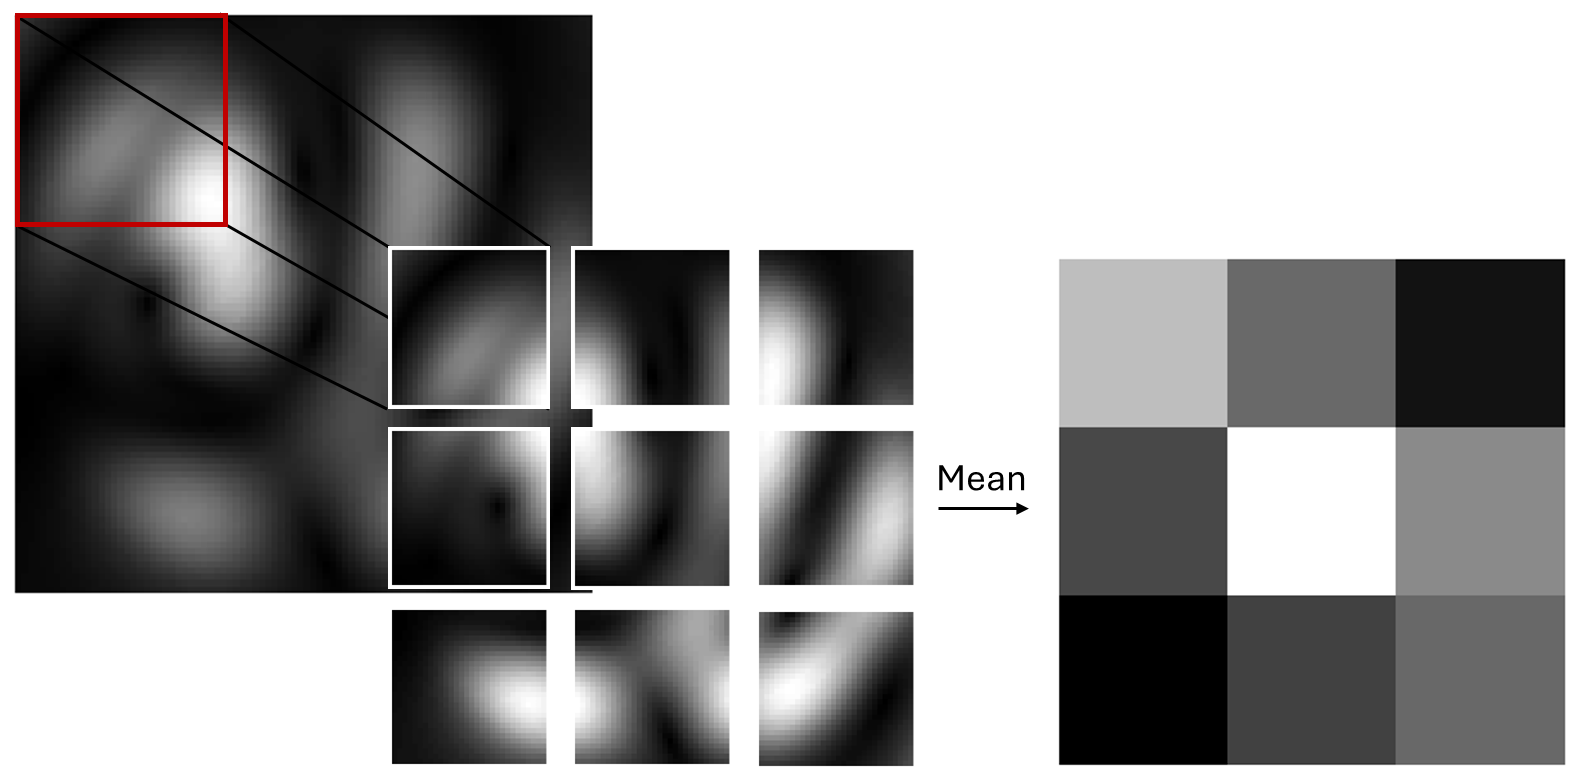

In [9]:
class FeaturesExtraction:
    def __init__(self, image):
        self.image = image

    def pixDist(self):
        (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(self.image)
        return np.sqrt((minLoc[0] - maxLoc[0]) ** 2 + (minLoc[1] - maxLoc[1]) ** 2)

    def pixRedox(self, new_pix_size):
        self.nps = new_pix_size
        resumen = []
        for i in range(3):
            for j in range(3):
                bloque = self.image[(i * self.nps):(i + 1) * self.nps,(j * self.nps):(j + 1) * self.nps]
                promedio = np.mean(bloque)
                resumen.append(promedio)
        return resumen

In [10]:
Chung = image.shape[1] // 3

images_9pix = []
pix_distances = []

#image = cv2.resize(df_grouped.iloc[5][1:].values.astype(np.uint8), (90, 90), interpolation=cv2.INTER_AREA)

for index in range(1001):
    reconstructedImage = df.iloc[index][2:].values.astype(np.uint8).reshape((90, 90))
    FtExtraction = FeaturesExtraction(reconstructedImage)
    pix_distances.append(FtExtraction.pixDist())
    images_9pix.append(FtExtraction.pixRedox(Chung))


In [11]:
Features = pd.DataFrame(images_9pix)
Features['Gradient'] = pix_distances
Features_cols = [f'Feature #{i+1}' for i in range(9)] + ['Gradient']
Features.columns = Features_cols
Features['Categories'] = df['Categories']
Features

,Feature #1,Feature #2,Feature #3,Feature #4,Feature #5,Feature #6,Feature #7,Feature #8,Feature #9,Gradient,Categories
0,47.351111,37.208889,26.585556,33.017778,55.204444,40.990000,24.305556,32.247778,36.970000,32.015621,0
1,47.218889,37.355556,26.643333,32.931111,55.201111,40.993333,24.282222,32.266667,36.863333,31.400637,0
2,47.063333,37.512222,26.690000,32.876667,55.212222,41.011111,24.266667,32.283333,36.792222,32.015621,0
3,46.943333,37.650000,26.756667,32.821111,55.225556,41.014444,24.243333,32.304444,36.700000,31.400637,0
4,46.814444,37.801111,26.822222,32.772222,55.240000,41.023333,24.221111,32.337778,36.602222,31.622777,0
...,...,...,...,...,...,...,...,...,...,...,...
996,34.506667,14.081111,9.705556,46.840000,31.304444,19.245556,19.342222,36.235556,27.328889,31.400637,9
997,34.535556,14.041111,9.755556,46.876667,31.177778,19.264444,19.343333,36.182222,27.394444,31.400637,9
998,34.573333,14.008889,9.814444,46.908889,31.080000,19.285556,19.362222,36.141111,27.481111,31.400637,9
999,34.630000,13.973333,9.873333,46.946667,31.002222,19.306667,19.370000,36.112222,27.544444,31.400637,9


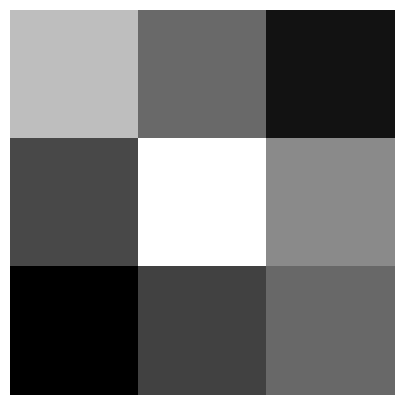

In [12]:
index= 0
imagen = Features.iloc[index][:-2].values.reshape((3, 3))

plt.figure(figsize=(5,5))
plt.imshow(imagen, cmap='gray')
#plt.title(f"Image #{index+1}")
plt.axis('off')
plt.show()

## 4. Statistical analysis of custom data and feature extraction

In [13]:
Features.describe()

,Feature #1,Feature #2,Feature #3,Feature #4,Feature #5,Feature #6,Feature #7,Feature #8,Feature #9,Gradient,Categories
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,35.009845,30.873822,16.575765,37.787136,49.221091,26.474355,22.109653,35.668371,29.288303,48.034768,4.459540
std,5.896119,13.013701,8.043212,13.245456,15.459484,11.255044,4.719874,4.850124,5.470149,14.940137,2.854577
min,26.321111,13.922222,6.730000,21.350000,27.073333,10.354444,14.704444,25.040000,16.330000,18.357560,0.000000
25%,29.503333,16.860000,9.498889,25.925556,33.273333,17.384444,18.012222,33.307778,24.870000,32.015621,2.000000
50%,34.441111,27.322222,13.070000,34.013333,53.545556,23.606667,21.684444,34.974444,28.803333,50.606324,4.000000
75%,41.215556,45.373333,24.042222,46.362222,63.145556,37.440000,24.824444,37.063333,34.234444,62.128898,7.000000
max,47.802222,54.964444,34.764444,65.205556,77.996667,55.623333,37.770000,53.321111,42.565556,70.859015,9.000000


Seeing this result we can say that the features that have a higher value of standard deviation can be selected as a better feature to clasify the data, i.e. Feature #5 and the gradient vs. Feature #7 and Feature #8 which have the lower values of standard deviation.

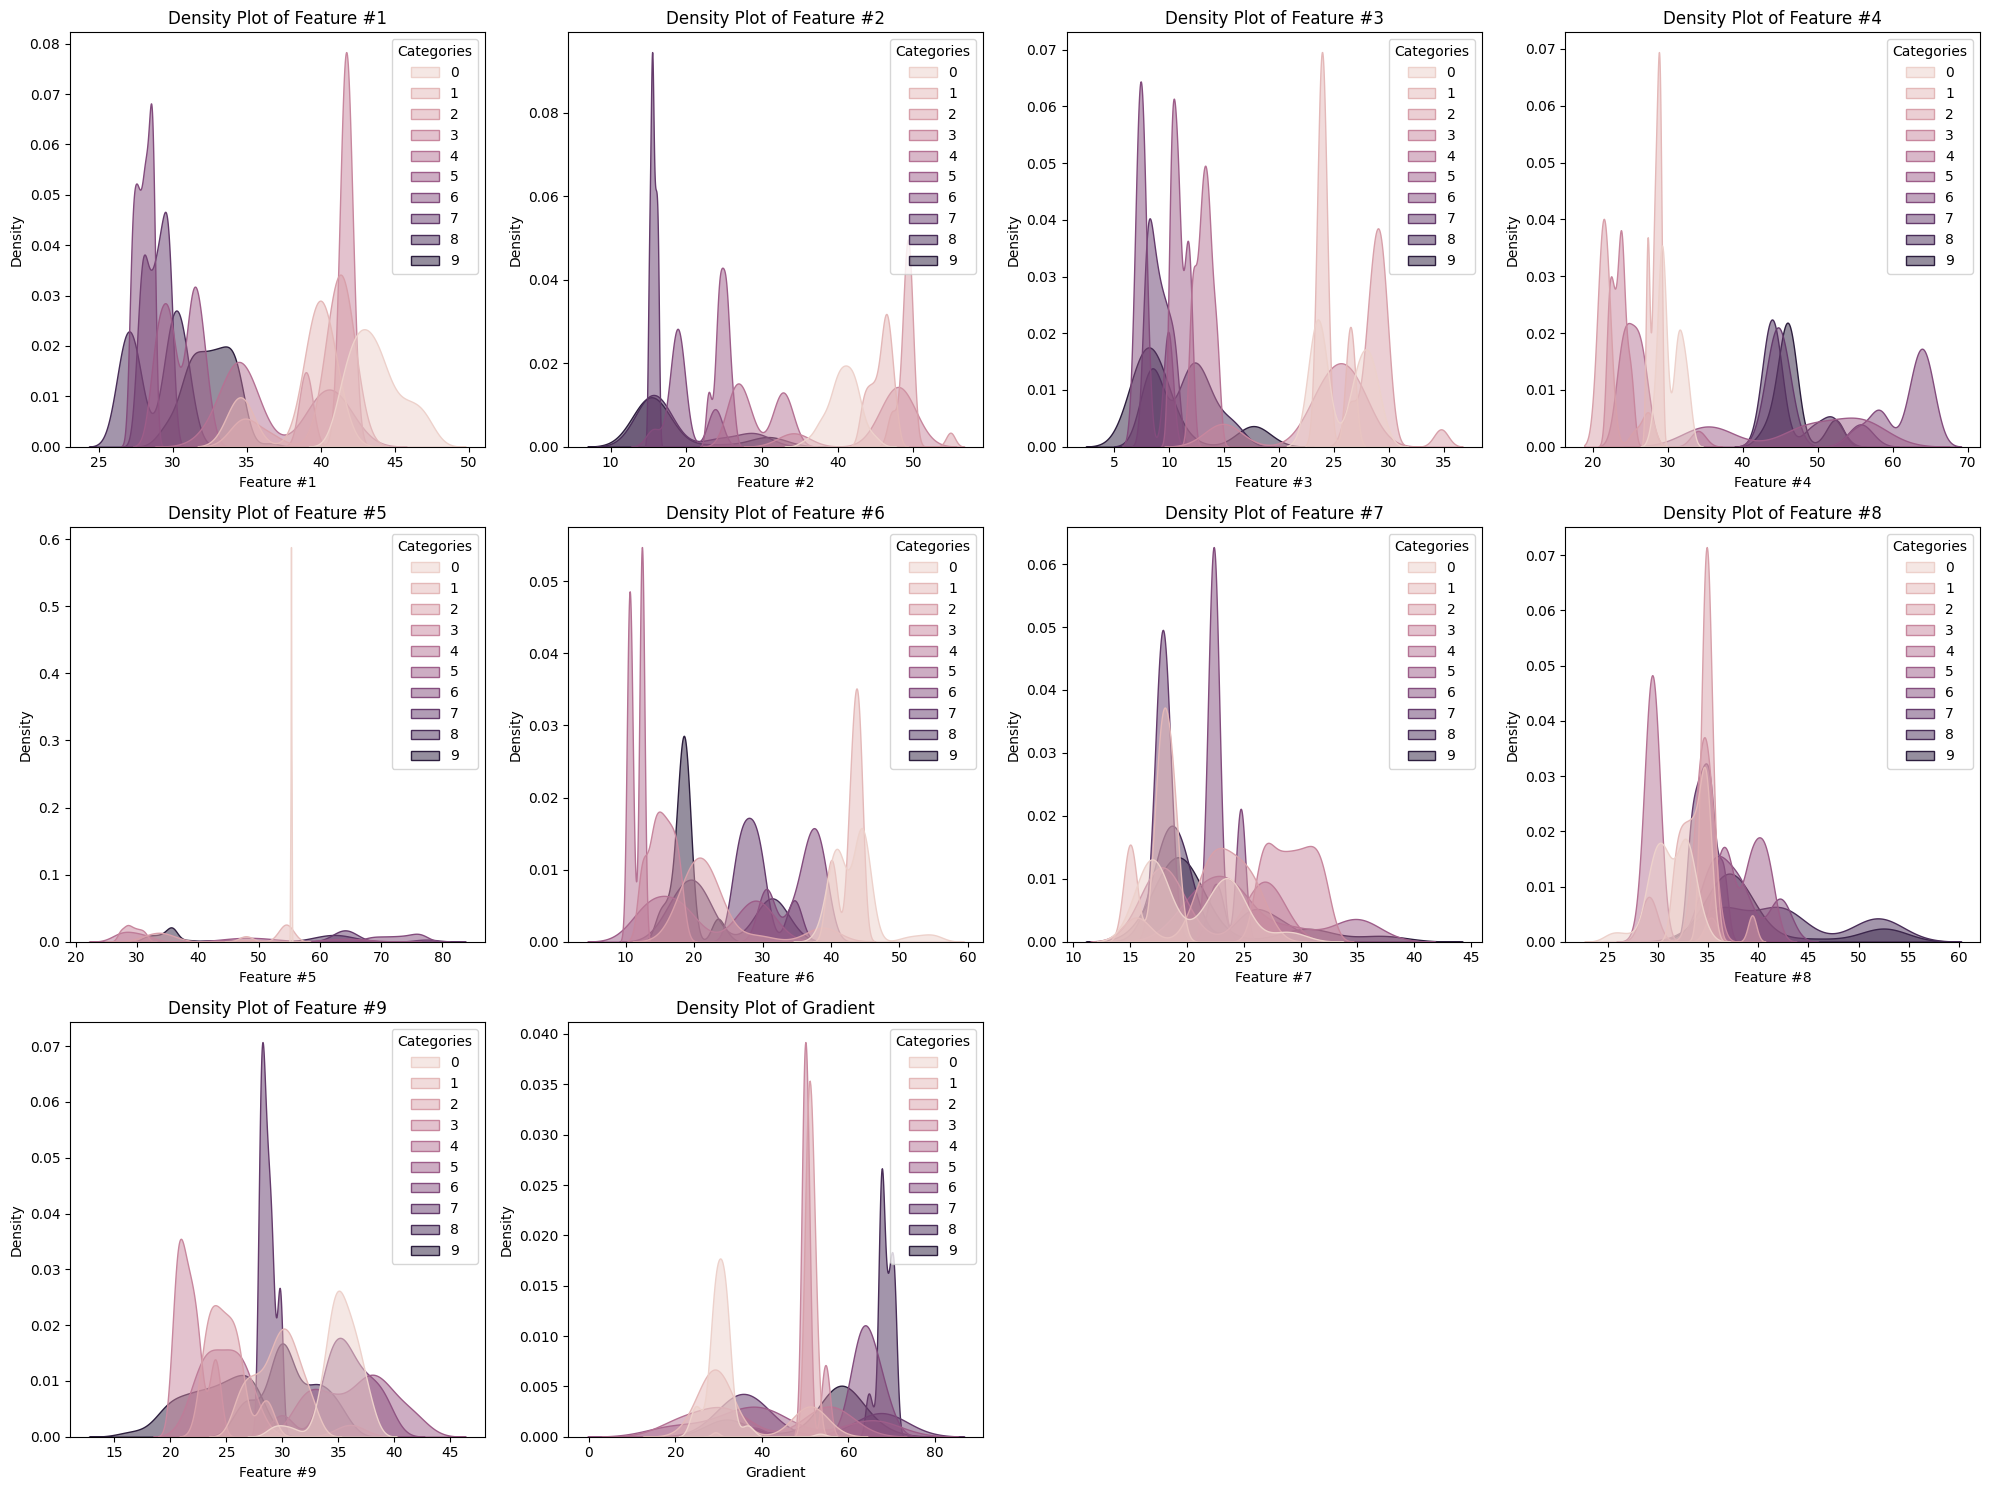

In [14]:
plt.figure(figsize=(20,15))
for i, feature in enumerate(Features_cols):
    plt.subplot(3, 4, i + 1)
    sns.kdeplot(data=Features, x=feature, hue='Categories', fill=True, alpha=0.5)
    plt.title(f'Density Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

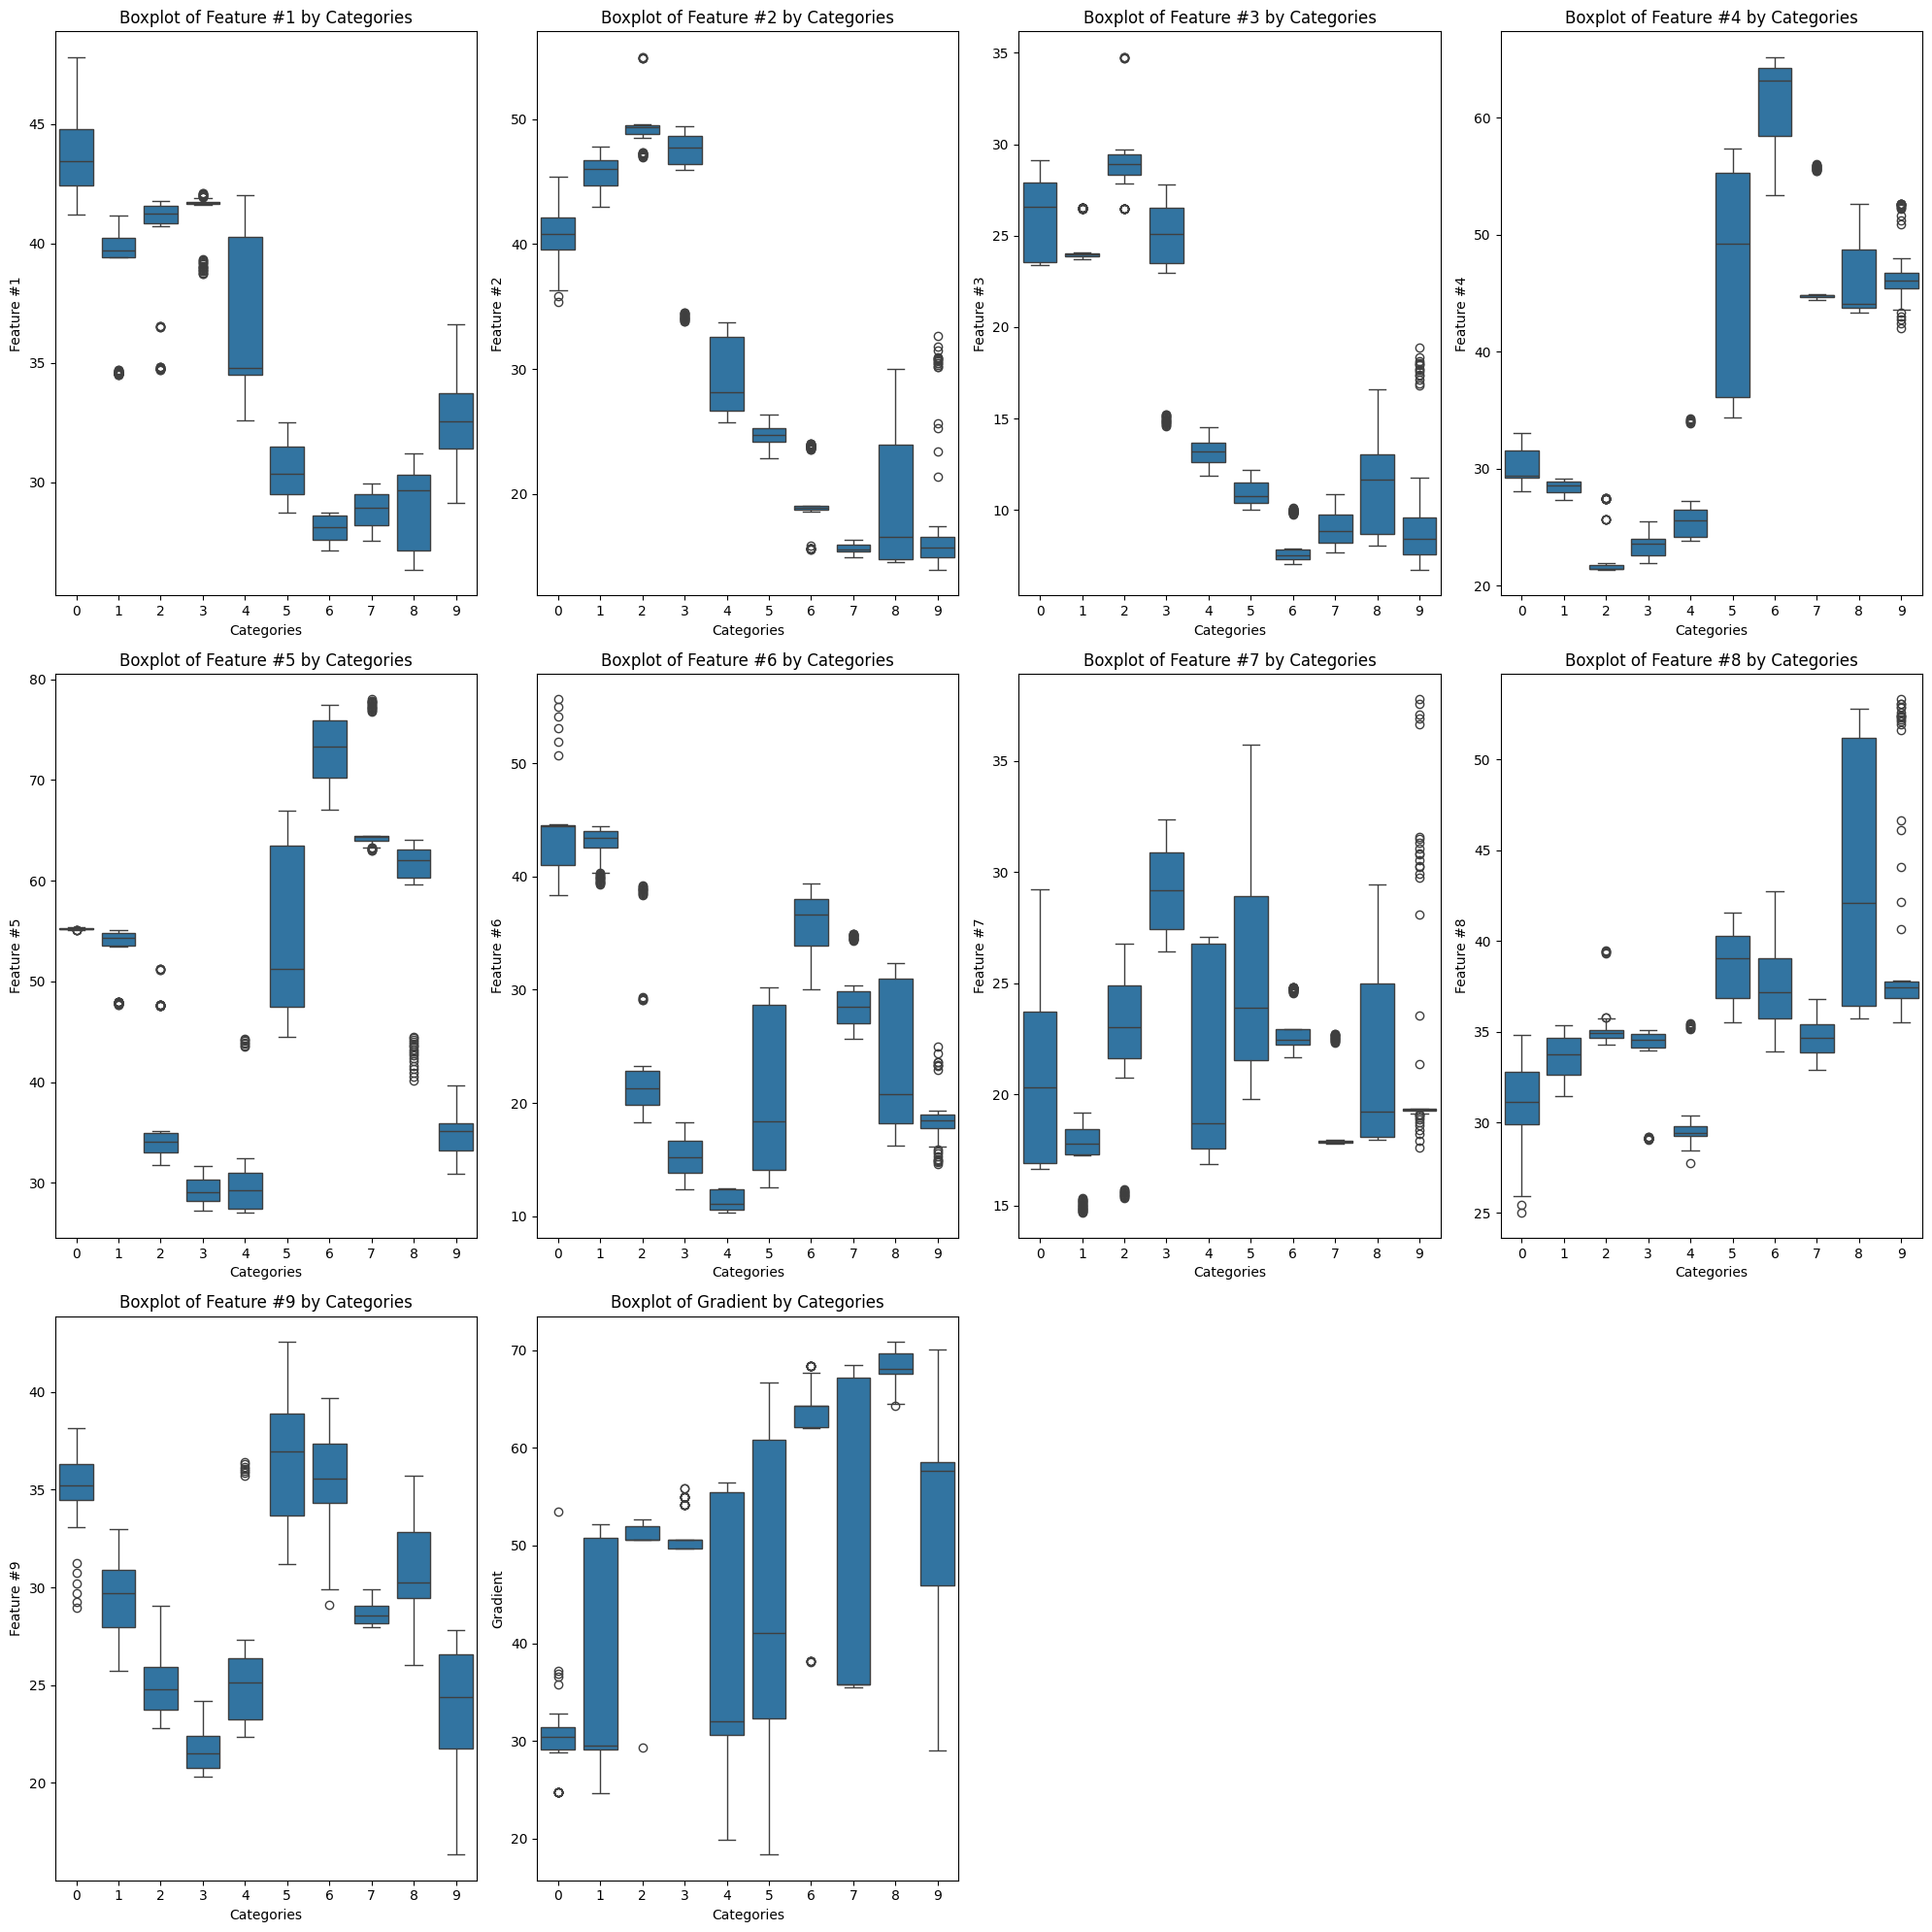

In [15]:
plt.figure(figsize=(20,20))
for i, feature in enumerate(Features_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x='Categories', y=feature, data=Features)#, palette='Set2')
    plt.title(f'Boxplot of {feature} by Categories')
    plt.xlabel('Categories')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

As shown in the boxplot and the density Feature #5 and the gradient seems to have a high value of standard deviation but these plots show that this characteristics by themselves are not the best to clasify the images, maybe Feature #5 can be useful by itself to clasify only images with category 5. 

Also, we can see that the first 4 features can be useful to clasify the images in ranges of categories, i.e. it's easiest to clasify the images if we group the categories in 2 groups (Group 1: the first half of the categories, Group 2: the rest of the categories).

Also, we can conclude that we were right when we said that Feature #7 and Feature #8 are not the best features for data clasification. In the density plot is shown that this data are grouped in a short range of values.

In [17]:
features = list(Features.drop('Categories', axis=1).columns)
print(features)
type(Features[Features[features[-1]] == 0][features[2]])

['Feature #1', 'Feature #2', 'Feature #3', 'Feature #4', 'Feature #5', 'Feature #6', 'Feature #7', 'Feature #8', 'Feature #9', 'Gradient']


pandas.core.series.Series

Now we make a H-test to define if the selected features have a significant statistical difference. First we verify if the data has a normal distribution or not.

In [48]:
NormalTestVisualization = []
shapiroData = []
for i in range(10):
    for j in range(9):
        data = Features[Features['Categories'] == i][f'Feature #{j+1}'] 
        shapiroTest = shapiro(data)
        shapiroData.append(shapiroTest[1])
    data = Features[Features['Categories'] == i][f'Gradient'] 
    shapiroTest = shapiro(data)
    shapiroData.append(shapiroTest[1])
    NormalTestVisualization.append(shapiroData)
    shapiroData = []

NormalTest = pd.DataFrame(NormalTestVisualization)
NormalTest.columns = Features.drop('Categories', axis=1).columns
NormalTest

,Feature #1,Feature #2,Feature #3,Feature #4,Feature #5,Feature #6,Feature #7,Feature #8,Feature #9,Gradient
0,6.243885e-04,7.563314e-01,4.084965e-11,2.078991e-08,1.102992e-01,1.119855e-11,4.439463e-10,8.567044e-04,1.362953e-06,1.723660e-13
1,3.626958e-13,3.155857e-04,3.314743e-15,1.820524e-08,3.417902e-14,3.847219e-10,1.785941e-09,1.270842e-04,1.943561e-02,2.215316e-14
2,1.736503e-15,1.488364e-14,5.311702e-12,1.363213e-16,8.962187e-15,5.688309e-14,2.129087e-08,1.930126e-16,7.763997e-06,2.610574e-20
3,7.672008e-16,7.131873e-15,2.930942e-12,2.484340e-03,4.457051e-04,4.391292e-04,5.220866e-05,2.255532e-15,3.478632e-07,1.247816e-14
4,1.342463e-10,1.691100e-09,1.831006e-02,1.074995e-13,2.088486e-14,7.108905e-12,1.544152e-12,6.861405e-16,6.135956e-13,8.560359e-11
5,6.587078e-06,7.198730e-03,1.824722e-05,9.649644e-10,2.806895e-09,4.191814e-10,1.517759e-09,5.360857e-06,1.704631e-03,1.897899e-07
6,9.545160e-06,8.771377e-12,4.422901e-13,1.613276e-09,5.506007e-05,1.249918e-08,4.175401e-12,1.537080e-06,5.933581e-05,2.555628e-16
7,1.278467e-04,4.666350e-03,1.270233e-04,2.202531e-17,1.232773e-16,8.101747e-09,1.890531e-17,1.085770e-02,1.005643e-06,6.867358e-15
8,9.686514e-09,1.245021e-12,1.658165e-05,9.768223e-14,7.416898e-15,8.523712e-11,1.610157e-12,8.384556e-10,2.307738e-03,4.154152e-06
9,1.313745e-01,5.713250e-14,1.108216e-12,8.885722e-10,4.369934e-03,1.138190e-08,3.879874e-15,1.356336e-14,5.303909e-04,8.955760e-12


Here is shown that none of the data has a normal distribution since all results are lower than 0.05 so we need to apply a Kruskal-Wallis test

In [ ]:
for i in range(10):
    groups = []

    if i == 9:
        for _, group in Features.groupby('Categories'):
            groups.append(group['Gradient'].values)
    else:
        for _, group in Features.groupby('Categories'):
            groups.append(group[f'Feature #{i+1}'].values)
    
    h_stat, p_value = kruskal(*groups)
    print(f'Feature #{i+1} - H-statistic: {h_stat:.4f}, p-value: {p_value:.4e}')

    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print(f"We reject the null hypothesis. There is a significant difference in the variance of Feature # {i+1} among all the categories.")
    else:
        print(f"We fail to reject the null hypothesis. There is no significant difference in the variance of Feature # {i+1} among all the categories.")

Feature #1 - H-statistic: 905.1463, p-value: 4.8151e-189
We reject the null hypothesis. There is a significant difference in the variance of Feature # 1 among all the categories.
Feature #2 - H-statistic: 895.9484, p-value: 4.6175e-187
We reject the null hypothesis. There is a significant difference in the variance of Feature # 2 among all the categories.
Feature #3 - H-statistic: 870.9102, p-value: 1.1440e-181
We reject the null hypothesis. There is a significant difference in the variance of Feature # 3 among all the categories.
Feature #4 - H-statistic: 917.2313, p-value: 1.1981e-191
We reject the null hypothesis. There is a significant difference in the variance of Feature # 4 among all the categories.
Feature #5 - H-statistic: 899.7574, p-value: 6.9782e-188
We reject the null hypothesis. There is a significant difference in the variance of Feature # 5 among all the categories.
Feature #6 - H-statistic: 875.1131, p-value: 1.4225e-182
We reject the null hypothesis. There is a signif

In [20]:
# Calculate means for each feature by Categories
feature_means_by_Categories = Features.groupby('Categories').mean()

print('Mean of feature j in class i:\n')
print(feature_means_by_Categories)

# Calculate overall mean for each feature
overall_mean = Features.drop('Categories', axis=1).mean()


print('\nOverall mean of feature j:\n')
print(overall_mean)



# Calculate within-class scatter matrix
within_class_scatter = np.zeros((len(Features_cols), len(Features_cols)))
for Categories in range(3):
    Categories_df = Features[Features['Categories'] == Categories].drop('Categories', axis=1)
    Categories_means = feature_means_by_Categories.iloc[Categories]
    within_class_scatter += np.dot((Categories_df - Categories_means).T, (Categories_df - Categories_means))

# Calculate between-class scatter matrix
between_class_scatter = np.zeros((len(Features_cols), len(Features_cols)))
for Categories, Categories_means in feature_means_by_Categories.iterrows():
    n = len(Features[Features['Categories'] == Categories])
    between_class_scatter += n * np.outer((Categories_means - overall_mean), (Categories_means - overall_mean))

# Calculate Fisher's discriminant ratio for each feature
fisher_discriminant_ratio = np.diag(np.dot(np.linalg.inv(within_class_scatter), between_class_scatter))

# Print Fisher's discriminant ratio for each feature
print('\nFDR:\n')
for i, feature in enumerate(Features_cols):
    print(f'{feature}: {fisher_discriminant_ratio[i]}')

Mean of feature j in class i:

            Feature #1  Feature #2  Feature #3  Feature #4  Feature #5  \
Categories                                                               
0            43.730902   40.736271   25.713333   30.353597   55.232618   
1            38.791386   45.691793   24.507096   28.365941   52.924389   
2            40.313256   49.276172   28.931023   22.415413   36.146348   
3            41.278966   45.627151   23.746458   23.472365   29.211628   
4            37.025160   29.461496   13.174356   25.881661   30.144763   
5            30.511969   24.673212   10.934686   47.442156   54.670979   
6            28.022123   19.607437    7.982475   61.764873   72.926843   
7            28.854598   15.640407    9.024312   46.477063   66.178867   
8            28.822959   18.776337   11.366469   45.813410   58.770352   
9            32.525773   18.110628    9.771087   46.677053   34.711159   

            Feature #6  Feature #7  Feature #8  Feature #9   Gradient  
Categori

Now with the Fisher discriminant ratio and the H-test we can note that the best features for clasification are Feature #1, #2 and #4, as we could see in the graphics above

## 5. Data separability

In [27]:
X = Features[list(Features_cols)]
y = df_grouped.index
auc_scores = []
AUC_df = []
for class_idx in np.unique(y):
    for feature_idx in range(X.shape[1]):

        feature_values = X.iloc[feature_idx].values
    
        # Treat the samples of this class as positive and others as negative
        target = np.where(y == class_idx, 1, 0)

        auc_score = roc_auc_score(target, feature_values)
        if auc_score < 0.5:
          auc_score = 1 - auc_score
        auc_scores.append(auc_score)
    AUC_df.append(auc_scores)
    auc_scores = []

AUC_Data = pd.DataFrame(AUC_df)
AUC_Data

,0,1,2,3,4,5,6,7,8,9
0,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889
1,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667
2,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889,0.888889
3,0.555556,0.555556,0.555556,0.555556,0.555556,0.555556,0.555556,0.555556,0.555556,0.666667
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,0.777778,0.777778,0.777778,0.777778,0.777778,0.777778,0.777778,0.777778,0.777778,0.777778
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.555556
8,0.555556,0.555556,0.555556,0.555556,0.555556,0.555556,0.555556,0.555556,0.555556,0.555556
9,0.777778,0.777778,0.777778,0.777778,0.777778,0.777778,0.777778,0.777778,0.777778,0.777778


With the AUC for each class we can note that every feature is able to diferentiate the class between the images, specifically the classes 4 and 6 are the easiest to clasify with all the features.
Now we train a ramdom forest model to predict the classes of some images. The data is separated to be 30% for testing and 70% for training.

We calculate the Accuracy score, precision, recall and f1_score with the methods from scikit-learn library.

In [ ]:
from sklearn.metrics import (
accuracy_score,
precision_score,
recall_score,
f1_score,
classification_report,
)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize

Y = Features['Categories'].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Accuracy: {acc}')
print(f'Precision: {prec}')
print(f'Recall: {rec}')
print(f'F1-score: {f1}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9833887043189369
Precision: 0.9838642473118281
Recall: 0.9834408602150537
F1-score: 0.9833787969138784
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.93      0.97        30
           2       0.97      0.97      0.97        30
           3       0.97      1.00      0.98        31
           4       1.00      1.00      1.00        31
           5       0.97      1.00      0.98        30
           6       1.00      0.97      0.98        31
           7       0.97      1.00      0.98        30
           8       1.00      0.97      0.98        30
           9       1.00      1.00      1.00        28

    accuracy                           0.98       301
   macro avg       0.98      0.98      0.98       301
weighted avg       0.98      0.98      0.98       301

ROC-AUC (macro): 1.0000


Finally we have the metrics which all of them are higher than 0.98 which means that the model is able to idenfity the classes of the images with the features extracted.
We also present a report with all the metrics for each class, where is shown that class 4 is always identified, category 9 as well.